In [1]:
import numpy as np
import pylab
import pandas as pd
from scipy.stats import linregress
from matplotlib.colors import LogNorm
from numpy import polyfit
from scipy.optimize import brenth
from scipy.interpolate import interp1d,UnivariateSpline
%matplotlib inline
import seaborn as sns


In [2]:
def get_proba(df,LSIM):
    meanval = df[df.LSIM==LSIM].groupby(['NSUMO'])['ClusterSize'].mean()
    
    errors = df[df.LSIM==LSIM].groupby(['NSUMO'])['ClusterSize'].std()
    ddf = meanval.to_frame()
    errors = errors.to_frame()
    ddf['errors'] = errors['ClusterSize']
    ddf.reset_index(inplace=True)
    k = ddf.groupby(['NSUMO']).mean().reset_index()
    return k

In [155]:
df1 = pd.read_csv('sizeDistri_run12_new.txt', sep='\t', header=None)
df1.columns = ['NSIM', 'NSUMO', 'LSIM', 'LSUMO', 'beta', 'gamma', 'step', 'sumoSizes', 'simSizes']
cluster_size = []
for idx in range(len(df1)):
    distri = df1.loc[idx].sumoSizes
    sizes = distri.split('[')[1].split(']')[0].split(' ')
    sizes = filter(None, sizes)
    sizes = pylab.array([int(ele) for ele in sizes])
    cluster_size.append(sum(np.square(sizes))/float(sum(sizes)))
df1['ClusterSize'] = cluster_size
df1 = df1[df1.beta==10]



In [156]:
df2 = pd.read_csv('sizeDistri_run13_new.txt', sep='\t', header=None)
df2.columns = ['NSIM', 'NSUMO', 'LSIM', 'LSUMO', 'beta', 'gamma', 'step', 'sumoSizes', 'simSizes']
cluster_size = []
for idx in range(len(df2)):
    distri = df2.loc[idx].sumoSizes
    sizes = distri.split('[')[1].split(']')[0].split(' ')
    sizes = filter(None, sizes)
    sizes = pylab.array([int(ele) for ele in sizes])
    cluster_size.append(sum(np.square(sizes))/float(sum(sizes)))
df2['ClusterSize'] = cluster_size
df2 = df2[df2.beta==10]


In [157]:
df3 = pd.read_csv('sizeDistri_run14_new.txt', sep='\t', header=None)
df3.columns = ['NSIM', 'NSUMO', 'LSIM', 'LSUMO', 'beta', 'gamma', 'step', 'sumoSizes', 'simSizes']
cluster_size = []
for idx in range(len(df3)):
    distri = df3.loc[idx].sumoSizes
    sizes = distri.split('[')[1].split(']')[0].split(' ')
    sizes = filter(None, sizes)
    sizes = pylab.array([int(ele) for ele in sizes])
    cluster_size.append(sum(np.square(sizes))/float(sum(sizes)))
df3['ClusterSize'] = cluster_size
df3 = df3[df3.beta==10]



In [158]:
i=8

x1 = get_proba(df1,i).NSUMO*8/2500
y1 = get_proba(df1,i).ClusterSize/50
err1 = get_proba(df1,i).errors

x2 = get_proba(df2,i).NSUMO*8/10000
y2 = get_proba(df2,i).ClusterSize/100
err2 = get_proba(df2,i).errors

x3 = get_proba(df3,i).NSUMO*8/40000
y3 = get_proba(df3,i).ClusterSize/200
err3 = get_proba(df3,i).errors

In [159]:
from scipy.interpolate import UnivariateSpline


In [160]:
s = UnivariateSpline(x1, pylab.log(y1), s=1, k=3)
x = pylab.linspace(0, 0.85, 100)
yy1 = s(x)
s = UnivariateSpline(x2, pylab.log(y2), s=1, k=3)
yy2 = s(x)
s = UnivariateSpline(x3, pylab.log(y3), s=1, k=3)
yy3 = s(x)



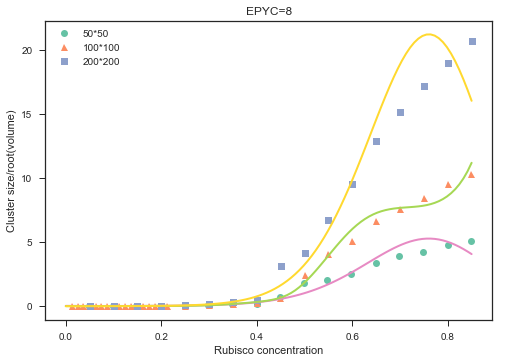

In [162]:
pylab.errorbar(x1,y1,fmt='o', linewidth=2,label='50*50')
pylab.errorbar(x2,y2,fmt='^', linewidth=2,label='100*100')
pylab.errorbar(x3,y3,fmt='s', linewidth=2,label='200*200')

pylab.errorbar(x, pylab.exp(yy1),fmt='-', linewidth=2)
pylab.errorbar(x, pylab.exp(yy2),fmt='-', linewidth=2)
pylab.errorbar(x, pylab.exp(yy3),fmt='-', linewidth=2)

#pylab.semilogy()

sns.set_style('ticks')
sns.set_palette("Set2", 10)
#pylab.axes().set_aspect(1)
pylab.xlabel('Rubisco concentration')
pylab.ylabel('Cluster size/root(volume)')
pylab.legend()
pylab.title('EPYC=8')
#pylab.ylim(0,5000)
pylab.savefig('/Users/guanhuahe/Desktop/jonikas_lab/Simulation_Rubisco/0605_meet/nolog_size_cluster(8)_VolumeRootDivision.pdf')

0       1.091892
1       1.293229
2       1.289268
3       1.524412
4       2.716332
5       3.967258
6       7.483428
7       8.631279
8      37.882497
9      89.617002
10    101.605026
11    126.113889
12    166.928638
13    194.947723
14    213.439901
15    239.189550
16    255.563930
Name: ClusterSize, dtype: float64

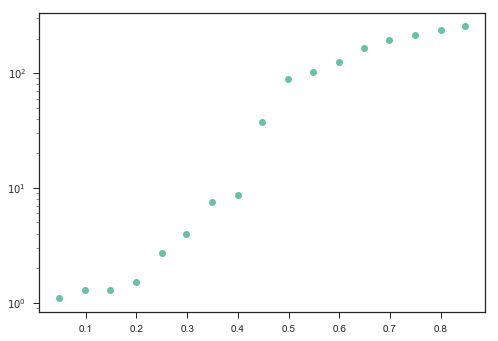

In [81]:
pylab.errorbar(x1,y1,yerr=err1/(50.0**2),fmt='o', linewidth=2,label='50*50')
pylab.semilogy()
y1